In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('statistics.csv')
df.head()

,Path,LeftOffset,RightOffset,TopOffset,BottomOffset,Width,Height,BoundingBoxArea,CharacterSize,SizeToImageRatio,...,LevelMean,LevelStd,Female,Male,Mag,Paladyn,Tancerz ostrzy,Tropiciel,Wojownik,Łowca
0,vip/587080_2.gif,0,0,0,0,32,48,1536,1057,0.688151,...,124.000000,92.795474,1.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000
1,spec/valczemyna.gif,0,0,0,2,32,46,1472,804,0.523438,...,80.941176,46.004715,0.117647,0.882353,0.000000,0.176471,0.235294,0.470588,0.058824,0.058824
2,vip/3239014.gif,0,0,0,0,32,48,1536,1095,0.712891,...,89.142857,58.004105,0.000000,1.000000,0.000000,0.000000,0.571429,0.142857,0.285714,0.000000
3,clan/jaruna_1574f.gif,0,0,0,0,32,48,1536,1077,0.701172,...,90.000000,84.852814,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
4,clan/infinity_93m.gif,1,2,0,1,29,47,1363,1086,0.707031,...,237.000000,54.725288,0.000000,1.000000,0.000000,0.125000,0.250000,0.375000,0.125000,0.125000


In [3]:
outfits = np.load('dataset.npy')
print(outfits.shape)
print(df.shape)

(3835, 48, 32, 4)
(3835, 58)


In [4]:
print(outfits.min(), outfits.max())

-1.0 1.0


In [5]:
outfits = (outfits + 1.0) * 127.5
outfits = outfits.astype(int)

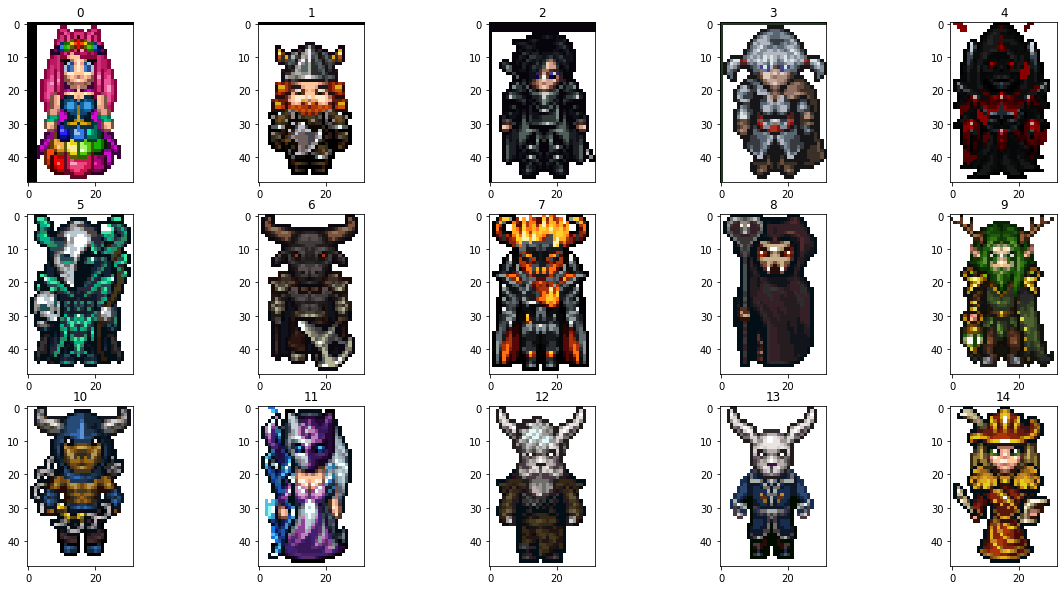

In [6]:
plt.figure(figsize=(20, 10))
for i in range(15):
      plt.subplot(3, 5, i+1)
      plt.title(i)
      plt.imshow(outfits[i])
plt.show()

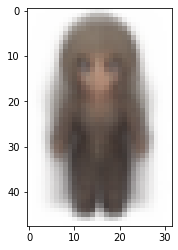

In [7]:
heatmap = outfits.mean(axis=0).astype(int)
plt.imshow(heatmap)

<h2>Profession analysis</h2>

In [11]:
professions = list(df.columns[-6:])
professions

['Mag', 'Paladyn', 'Tancerz ostrzy', 'Tropiciel', 'Wojownik', 'Łowca']

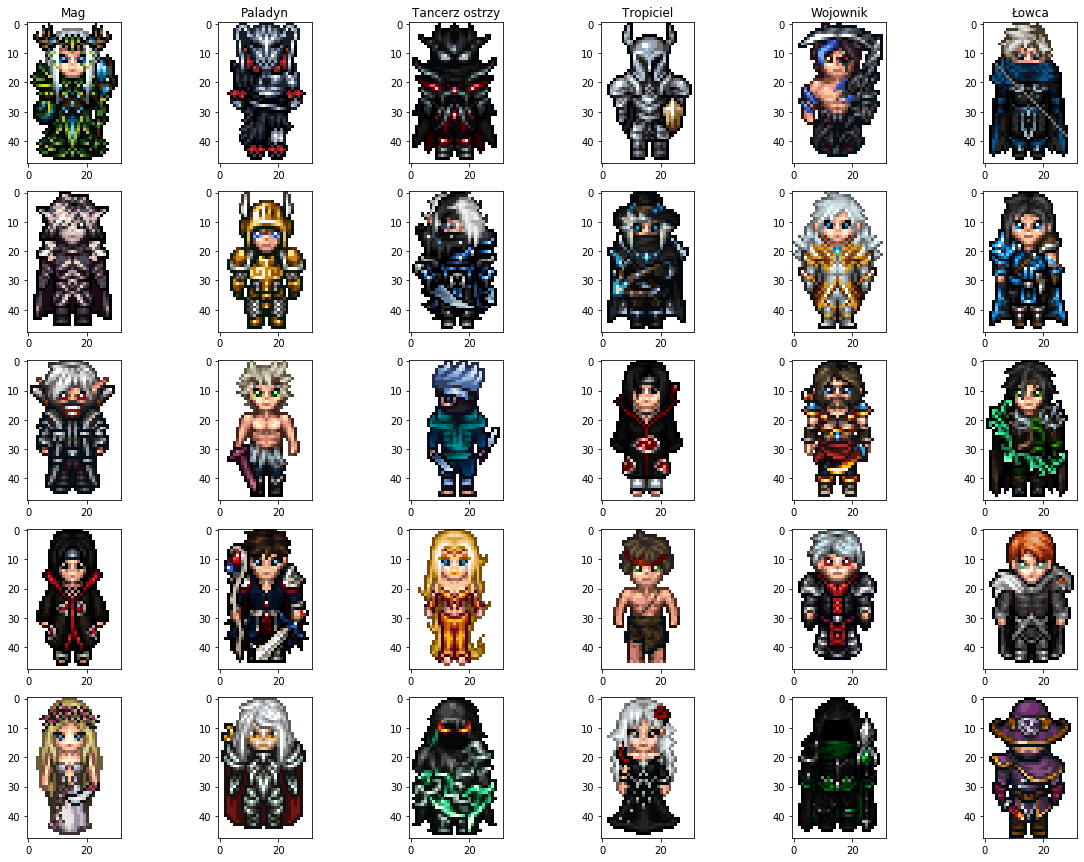

In [14]:
plt.figure(figsize=(20, 15))
eps = 0.1
for i in range(5 * len(professions)):
    plt.subplot(5, len(professions), i+1)
    if i < len(professions):
        plt.title(professions[i])
    profession_mask = df[professions[i % len(professions)]] > 1.0 - eps
    plt.imshow(outfits[profession_mask][i])
plt.show()

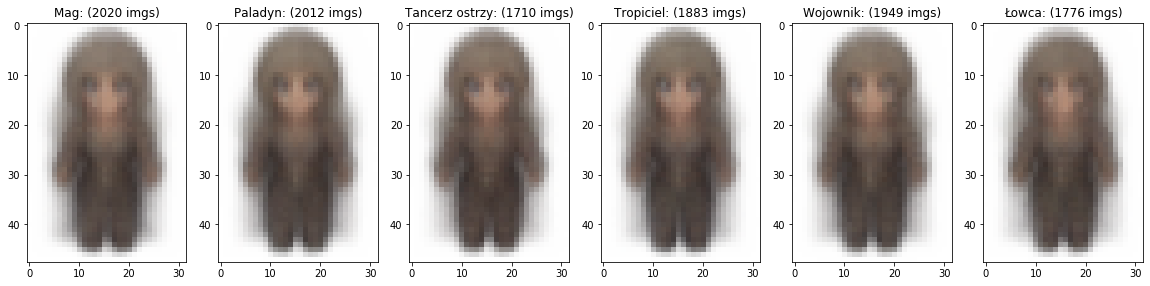

In [73]:
plt.figure(figsize=(20, 5))
for i in range(len(professions)):
    plt.subplot(1, len(professions), i+1)
    weights = np.array(df[professions[i]])
    mask = ~np.isnan(weights)
    plt.title(f'{professions[i]}: ({(weights[mask] > 0).sum()} imgs)')
    profession_heatmap = np.average(outfits[mask], axis=0, weights=weights[mask])
    profession_heatmap = profession_heatmap.astype(int)
    plt.imshow(profession_heatmap)
plt.show()

196
193
157
183
167
154


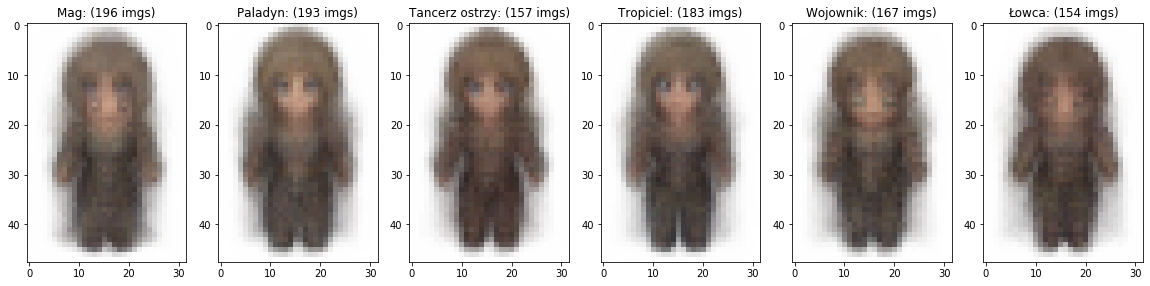

In [61]:
plt.figure(figsize=(20, 5))
eps = 0.01
for i in range(len(professions)):
    plt.subplot(1, len(professions), i+1)
    weights = np.array(df[professions[i]])
    mask = ~np.isnan(weights)
    mask = mask & (weights > 1.0 - eps)
    plt.title(f'{professions[i]}: ({mask.sum()} imgs)')
    profession_heatmap = np.mean(outfits[mask], axis=0)
    profession_heatmap = profession_heatmap.astype(int)
    plt.imshow(profession_heatmap)
plt.show()

<h2>Gender analysis</h2>

In [63]:
genders = ['Female', 'Male']

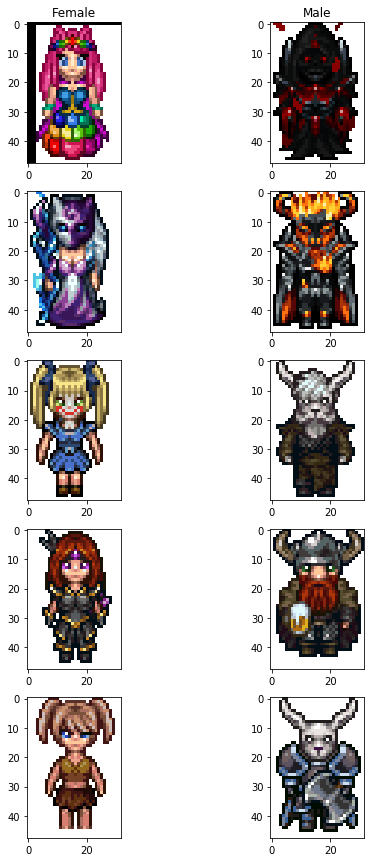

In [64]:
plt.figure(figsize=(8, 15))
eps = 0.1
for i in range(5 * len(genders)):
    plt.subplot(5, len(genders), i+1)
    if i < len(genders):
        plt.title(genders[i])
    gender_mask = df[genders[i % len(genders)]] > 1.0 - eps
    plt.imshow(outfits[gender_mask][i])
plt.show()

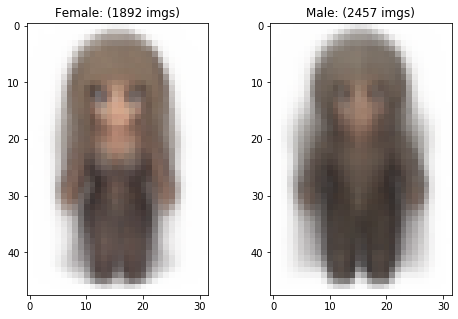

In [72]:
plt.figure(figsize=(8, 5))
for i in range(len(genders)):
    plt.subplot(1, len(genders), i+1)
    weights = np.array(df[genders[i]])
    mask = ~np.isnan(weights)
    plt.title(f'{genders[i]}: ({(weights[mask] > 0).sum()} imgs)')
    gender_heatmap = np.average(outfits[mask], axis=0, weights=weights[mask])
    gender_heatmap = gender_heatmap.astype(int)
    plt.imshow(gender_heatmap)
plt.show()

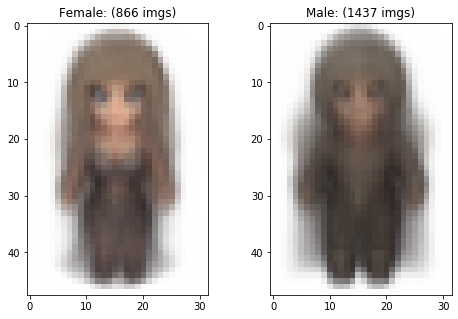

In [70]:
plt.figure(figsize=(8, 5))
eps = 0.01
for i in range(len(genders)):
    plt.subplot(1, len(genders), i+1)
    weights = np.array(df[genders[i]])
    mask = ~np.isnan(weights)
    mask = mask & (weights > 1.0 - eps)
    plt.title(f'{genders[i]}: ({mask.sum()} imgs)')
    gender_heatmap = np.mean(outfits[mask], axis=0)
    gender_heatmap = gender_heatmap.astype(int)
    plt.imshow(gender_heatmap)
plt.show()

<h2>Other statistics</h2>

In [163]:
def show_binned(outfits, statistic, bins=10, method='qcut'):
    mask = ~np.isnan(statistic)
    outfits = outfits[mask]
    statistic = statistic[mask]
    if method == 'qcut':
        stats_binned = pd.qcut(statistic, bins, labels=False, duplicates='drop')
    elif method == 'cut':
        stats_binned = pd.cut(statistic, bins, labels=False)
    else: 
        raise AttributeError('Method must be "cut" or "qcut"')
    
    max_cols = 5
    rows = np.ceil(bins / max_cols)
    cols = min(bins, max_cols)
    plt.figure(figsize=(3 * cols, 5 * rows))
    for i in range(bins):
        mask = stats_binned == i
        if mask.sum() == 0:
            if method == 'qcut':
                break
            else:
                continue
        plt.subplot(rows, cols, i+1)
        plt.title(f'bin: {i} ({mask.sum()} imgs)')
        current_bin_outfits = outfits[mask]
        plt.imshow(current_bin_outfits.mean(axis=0).astype(int))
    plt.show()

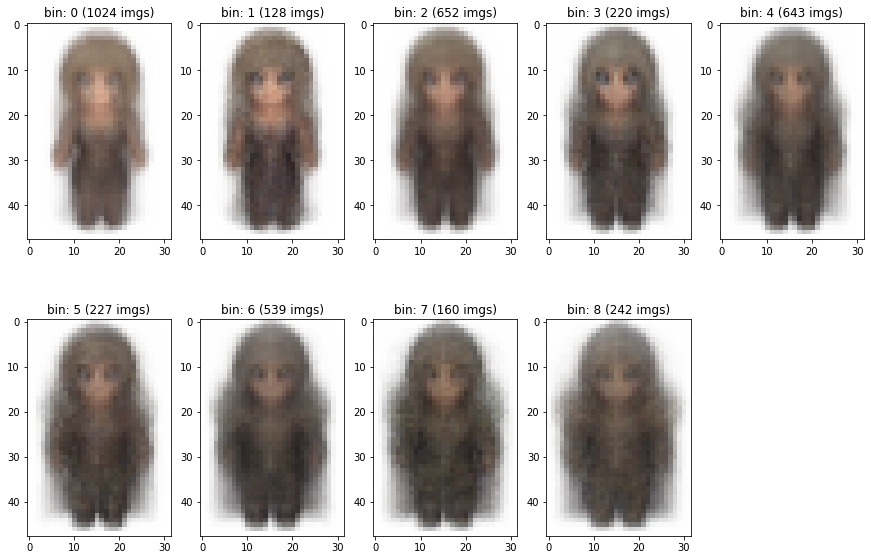

In [216]:
show_binned(outfits, df['Width'], bins=10, method='qcut')

In [211]:
red_histogram_cols = ['HistogramMaskedRedBin' + str(i) for i in range(1, 11)]
green_histogram_cols = ['HistogramMaskedGreenBin' + str(i) for i in range(1, 11)]
blue_histogram_cols = ['HistogramMaskedBlueBin' + str(i) for i in range(1, 11)]

In [212]:
df['Redness'] = 0
for i, col in enumerate(red_histogram_cols):
    df['Redness'] += i * df[col]

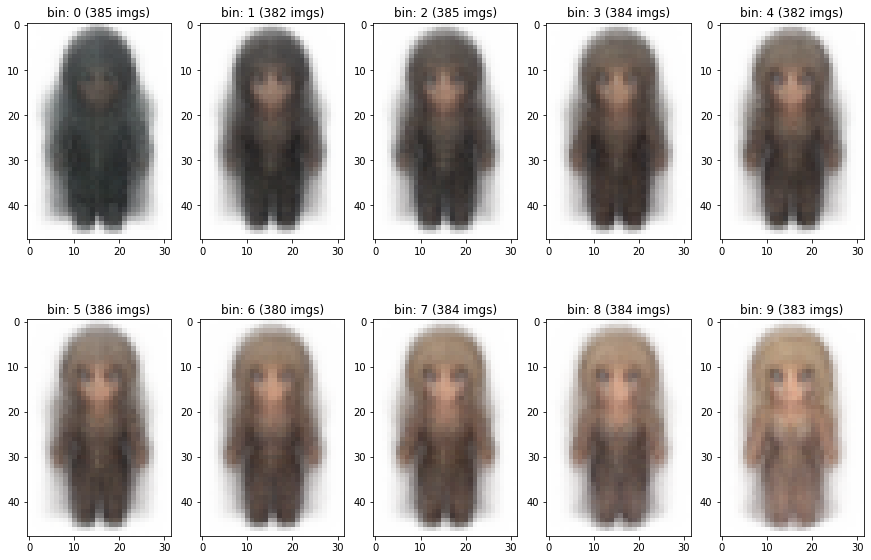

In [213]:
show_binned(outfits, df['Redness'], bins=10, method='qcut')

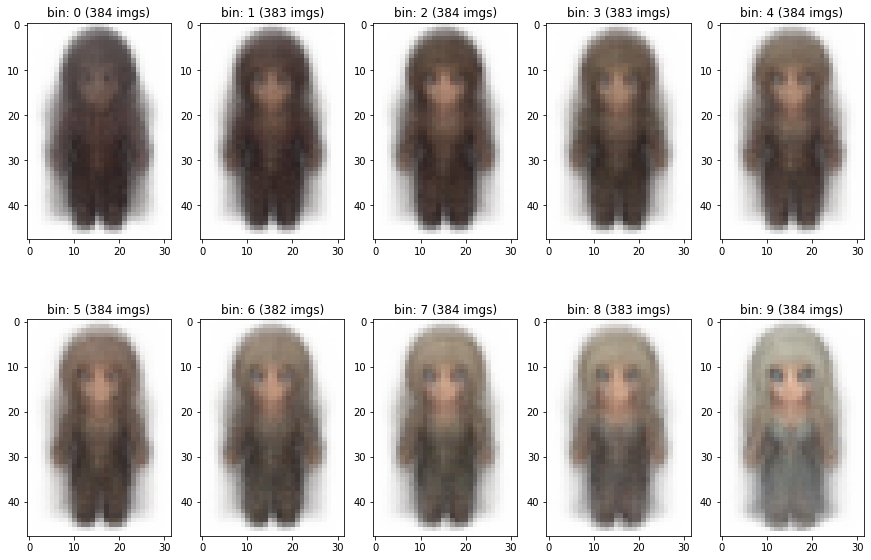

In [214]:
df['Greenes'] = 0
for i, col in enumerate(green_histogram_cols):
    df['Greenes'] += i * df[col]
show_binned(outfits, df['Greenes'], bins=10, method='qcut')

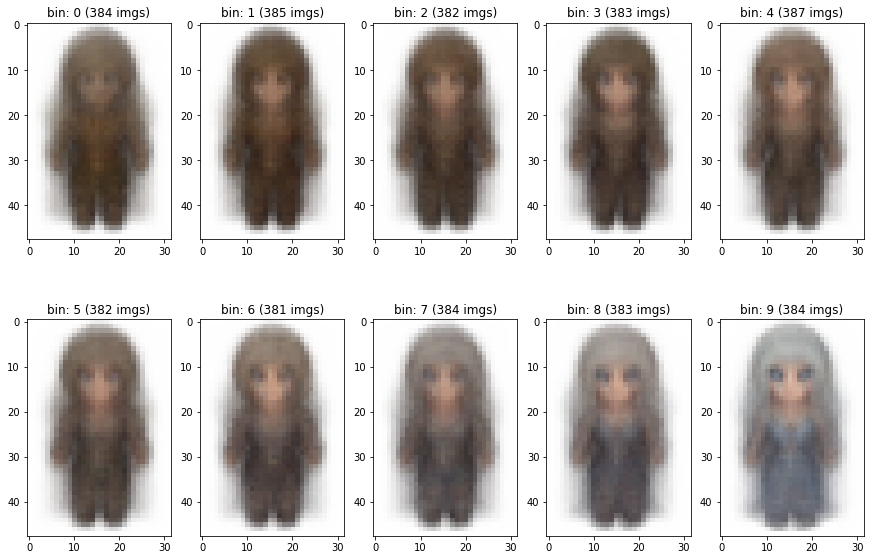

In [215]:
df['Blueness'] = 0
for i, col in enumerate(blue_histogram_cols):
    df['Blueness'] += i * df[col]
show_binned(outfits, df['Blueness'], bins=10, method='qcut')

In [ ]:
show_binned(outfits, Any_statistic_or_combination_of_statistics, bins=10, method='qcut')